# NOTEBOOK CREATED BY SHEHRYAR MALLICK

### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Unsupervised Learning. We will be using the facebook live sellers dataset for Task 1 & 2 of the assignment and here is a brief context about the same - The data is about live selling feature on the Facebook platform. Each record consists of information about the time live information of sale is posted to Facebook and engagements in the data. The engagements are regular Facebook interactions such as share and emotion rection.


###**Dataset**

Dataset Link: https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv

**About the dataset:**

The Facebook Live Sellers in Thailand is a dataset curated in UCI Machine Learning Datasets. It data contains 7050 observations and twelve attributes. In this assignment, the preprocessed dataset contains 7050 instances and 10 attributes. The details of the attributes are as follows:

* status_type: The type of shared status
* num_reactions: Number of glimpses over a shared status by viewers
* num_comments: Number of comments on that particular shared status
* num_shares: Toal number of shares by peers
* num_likes: Number of likes on the post
* num_loves: Number of love emojis of that shared post
* num_wows: Number of wow emojis on that post
* num_hahas: Number of haha emojis on that post
* num_sads: Number of sad emojis on that post
* num_angrys: Number of angry emojis on that post

## **Task 1: Data loading and Data Analysis**

* Load the data file into a dataframe object : df
* Display the first 5 observation of the dataset
* Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result. You can use the info() method for this.
* Perform EDA viz. Is there any missing values in each column of the provided dataset
* Display all the unique status_type of the dataframe
* Convert categorical variable, i.e., status_type into numerical representation using a label encoder

### IMPORTING THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

### Load the data file into a dataframe object : df

In [144]:
df = pd.read_csv('Live_20210128.csv')

### Display the first 5 observation of the dataset

In [145]:
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


### Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result. You can use the info() method for this.


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

### FIRST OBSERVATION:
* *There are a total of 16 columns out of which 12 have 7050 values in them indicating there does not prevail any missing values in the columns. While the columns 12 to 15 are filled with Nan.*

### SECOND OBSERVATION:
* *Out of the given 16 columns*
  * *2 are of object data type*
  * *10 are of the int64 type*
  * *4 are of float64 type*   

### Perform EDA viz. Is there any missing values in each column of the provided dataset


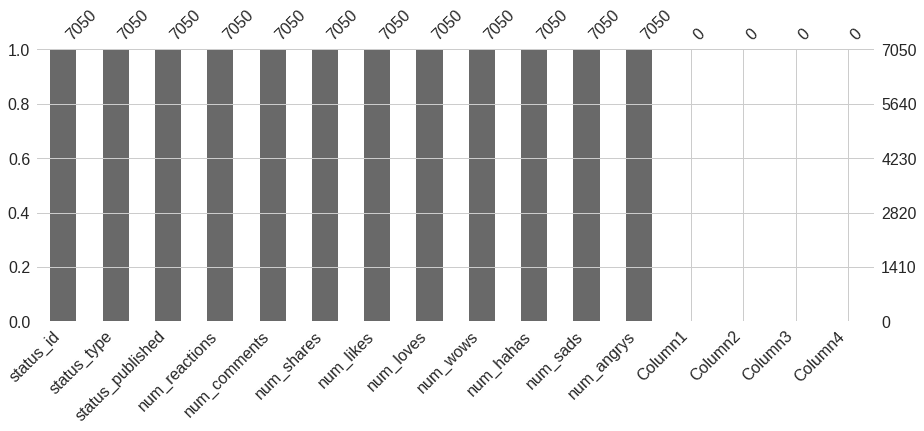

In [83]:
# missingo library is used to visualize the different columns and check if there are any missing value.

import missingno as msno
msno.bar(df,figsize=(15,5))

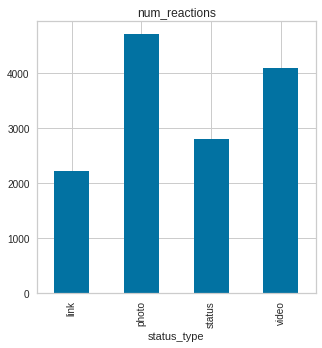

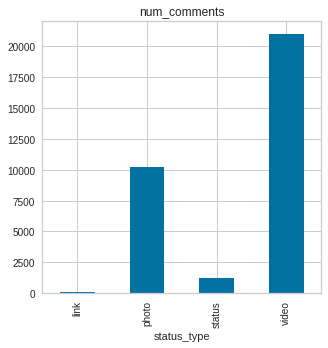

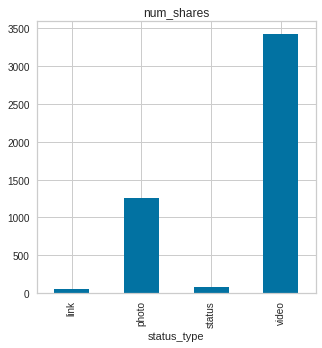

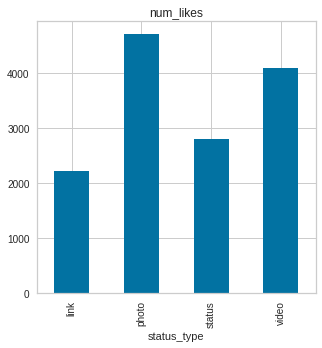

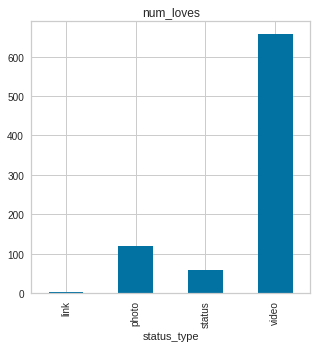

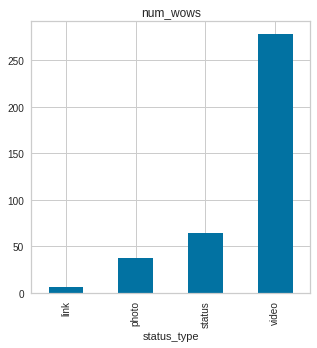

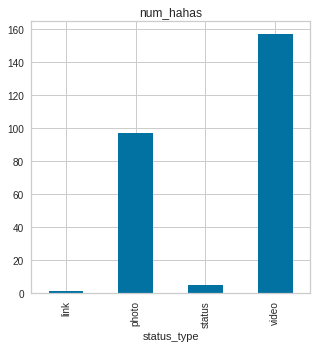

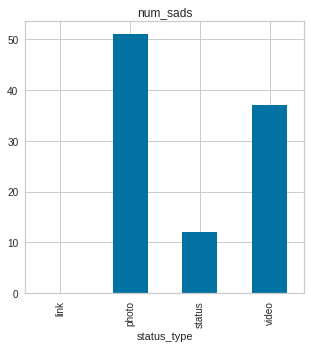

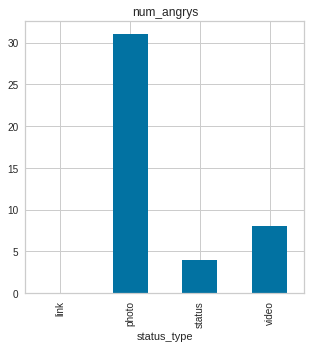

In [84]:
viz = ['num_reactions','num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas', 'num_sads', 'num_angrys'] 
for i in viz:
  plt.figure(figsize=(5,5))
  df.groupby('status_type')[i].max().plot(kind='bar')
  plt.title(i)

### Observations after EDA

No missing values were encountered in the columns specified in the problem statement however last 4 columns which came with the data set were completely empty. 

1.   Photos got the most number of reactions followed by video, status and link
2. Videos got the most number of comments and shares
3. Photos got the most like, sad and angry reactions
4. Videos got the most love, haha, wow reactions.
5. Of the four categories available link was the least interacted one with status being the 2nd least interacted category.


### Display all the unique status_type of the dataframe

In [146]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

### Convert categorical variable, i.e., status_type into numerical representation using a label encoder


In [147]:
label_encoder = preprocessing.LabelEncoder() 
df['status_type']= label_encoder.fit_transform(df['status_type'])
df['status_type'].unique()

array([3, 1, 0, 2])

In [148]:
df.drop(columns=['Column1', 'Column2', 'Column3','Column4'],axis=1,inplace=True)

In [170]:
target = df['status_type']

## **Task 2: Feature Scaling**


*   Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique
*   Use Elbow method to determine the number of cluster to be formed
*   Verify optimal number of clusers on the basis of silhouette scores
*   Assigning cluster label to each instance of the dataframe
*   Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score


### Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique


In [149]:
scaler = MinMaxScaler()
data = df.iloc[:,3:].values
scaled_data = scaler.fit_transform(data)
# scaled_data[0]

array([0.11231423, 0.02439257, 0.07651869, 0.09171975, 0.14003044,
       0.01079137, 0.00636943, 0.01960784, 0.        ])

### Use Elbow method to determine the number of cluster to be formed

In [150]:
from sklearn.cluster import KMeans

SSE = []
clusters = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(scaled_data)
  clusters.append(kmeanModel)
  SSE.append(kmeanModel.inertia_)

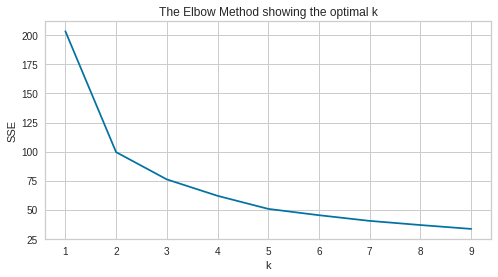

In [151]:
plt.figure(figsize=(8,4))
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Verify optimal number of clusers on the basis of silhouette scores

In [152]:
from sklearn.metrics import silhouette_score
Silhouette_score = []
for i in range(1,9):
    print("---------------------------------------")
    print(clusters[i])
    Silhouette_score.append(silhouette_score(scaled_data, clusters[i].predict(scaled_data)))
    print("Silhouette score:",silhouette_score(scaled_data, clusters[i].predict(scaled_data)))

---------------------------------------
KMeans(n_clusters=2)
Silhouette score: 0.8125263296259583
---------------------------------------
KMeans(n_clusters=3)
Silhouette score: 0.8170197330895552
---------------------------------------
KMeans(n_clusters=4)
Silhouette score: 0.6441230391121956
---------------------------------------
KMeans(n_clusters=5)
Silhouette score: 0.6971076864775408
---------------------------------------
KMeans(n_clusters=6)
Silhouette score: 0.6192107413608529
---------------------------------------
KMeans(n_clusters=7)
Silhouette score: 0.6298956175829461
---------------------------------------
KMeans()
Silhouette score: 0.6334429802409812
---------------------------------------
KMeans(n_clusters=9)
Silhouette score: 0.6369183030029502


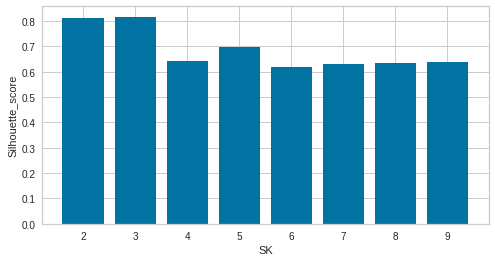

In [153]:
SK = range(2,10)
plt.figure(figsize=(8,4))
plt.bar(SK, Silhouette_score)
plt.xlabel('SK')
plt.ylabel('Silhouette_score')
plt.show()

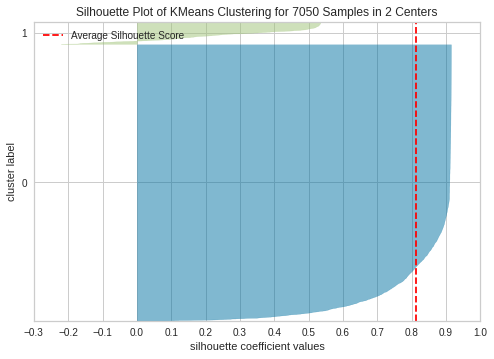

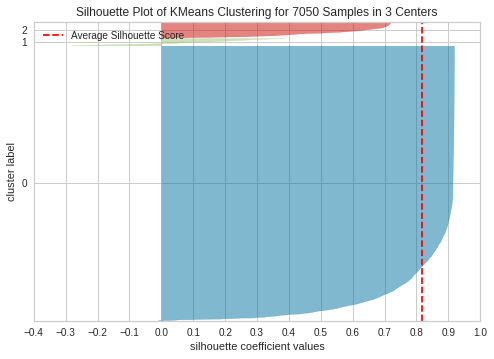

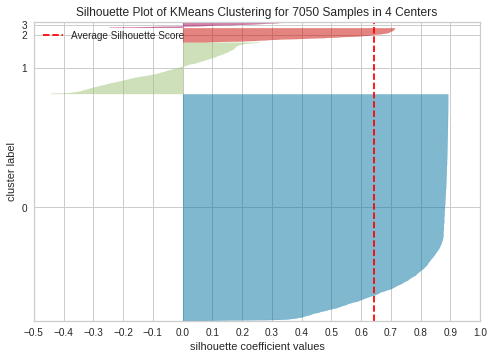

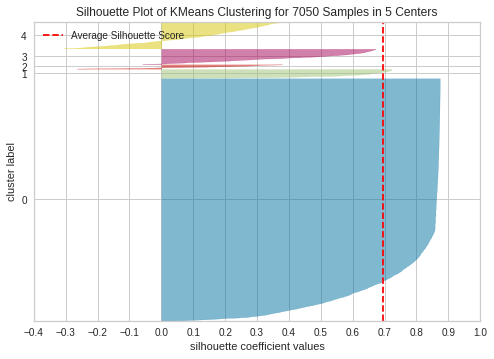

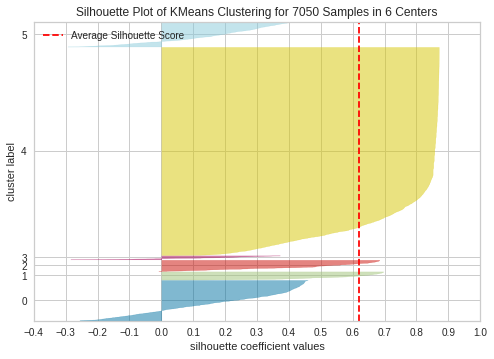

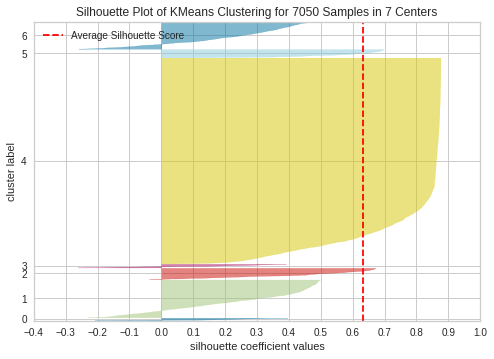

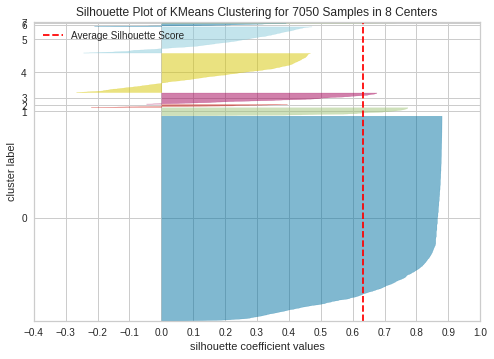

In [154]:
from yellowbrick.cluster import silhouette_visualizer
for i in range(2,9):
  silhouette_visualizer(KMeans(i, random_state=42), scaled_data, colors='yellowbrick')

### Assigning cluster label to each instance of the dataframe

#### NUMBER OF CLUSTERS K = 3

In [160]:
# from the elbow method and support from the Silhouette_score we will choose the optimal number of K=3

kmeanModel = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=0)
kmeanModel.fit(scaled_data)

y_pred = kmeanModel.predict(df[['num_reactions','num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas', 'num_sads', 'num_angrys']])
df['k_means'] = y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [211]:
# df['k_means'].unique()

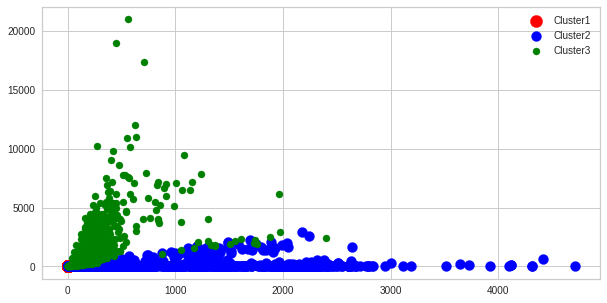

In [167]:
plt.figure(figsize=(10,5))
plt.scatter(data[y_pred==0, 0], data[y_pred==0, 1], s=150, c='red', label ='Cluster1')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='blue', label ='Cluster2')
plt.scatter(data[y_pred==2, 0], data[y_pred==2, 1], s=50, c='green', label ='Cluster3')
plt.legend()
plt.show()

#### NUMBER OF CLUSTERS K = 4

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


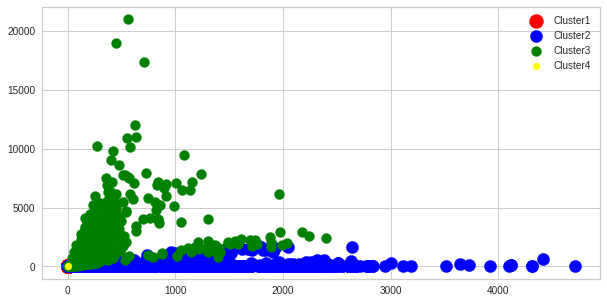

rand score is: 0.6221586483269596
adjusted rand score is: 0.2564089362792695


In [182]:
kmeanModel_4 = KMeans(init="k-means++",n_clusters=4,n_init=10,max_iter=300,random_state=0)
kmeanModel_4.fit(scaled_data)

y_pred_4 = kmeanModel_4.predict(df[['num_reactions','num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows','num_hahas', 'num_sads', 'num_angrys']])

plt.figure(figsize=(10,5))
plt.scatter(data[y_pred_4==0, 0], data[y_pred_4==0, 1], s=200, c='red', label ='Cluster1')
plt.scatter(data[y_pred_4==1, 0], data[y_pred_4==1, 1], s=150, c='blue', label ='Cluster2')
plt.scatter(data[y_pred_4==2, 0], data[y_pred_4==2, 1], s=100, c='green', label ='Cluster3')
plt.scatter(data[y_pred_4==3, 0], data[y_pred_4==3, 1], s=50, c='yellow', label ='Cluster4')
plt.legend()
plt.show()

### Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score


In [213]:
from sklearn.metrics.cluster import adjusted_rand_score, rand_score

RS = rand_score(y_pred,target)
ARS = adjusted_rand_score(y_pred,target)

print('rand score for K=3 is:',RS)
print('adjusted rand score for K=3 is:',ARS)
print('--------------------------------------------------------')

RS_4 = rand_score(y_pred_4,target)
ARS_4 = adjusted_rand_score(y_pred_4,target)

print('rand score for K=4 is:',RS_4)
print('adjusted rand score for K=4 is:',ARS_4)

rand score for K=3 is: 0.6121999901399424
adjusted rand score for K=3 is: 0.23748815153036323
--------------------------------------------------------
rand score for K=4 is: 0.6221586483269596
adjusted rand score for K=4 is: 0.2564089362792695


###**Task 3: Perform PCA on Fruit Dataset**

Fruit Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv

* Use PCA to find the first two principal components of the fruit dataset
* Scale the value. Each feature should be centered (zero mean) and with unit variance
* Analysis - perform PCA with 4 components and print their explained variance_ratio



### IMPORTING THE DATA SET

In [184]:
pca_df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv')

In [193]:
pca_df.head(5)

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


In [195]:
pca_features = pca_df.drop('fruit_label',axis=1)
pca_target = pca_df['fruit_label']

### Use PCA to find the first two principal components of the fruit dataset

In [201]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(pca_features)

pca.components_

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,28.886585,0.951174
1,16.876211,1.231441
2,12.875220,0.695777
3,-77.160264,1.824788
4,-79.163980,1.868074


### Scale the value. Each feature should be centered (zero mean) and with unit variance

In [214]:
from sklearn.preprocessing import StandardScaler

standScaler = StandardScaler()
standardFeatures = standScaler.fit_transform(pca_features)
standardFeatures

array([[ 0.52944179,  1.59869024, -0.29139659, -2.79359541],
       [ 0.30946246,  1.10485399, -0.66192242, -2.26868417],
       [ 0.23613601,  0.36409961, -0.36550175, -2.13745636],
       [-1.41370901, -1.11740915, -2.21813091,  0.48709984],
       [-1.45037224, -1.36432727, -2.29223608,  0.35587203],
       [-1.52369868, -1.6112454 , -2.51455158,  0.09341641],
       [-1.52369868, -1.48778634, -2.51455158,  0.61832765],
       [-1.59702513, -1.6112454 , -2.73686708,  0.61832765],
       [ 0.27279923, -0.00627758,  0.07912925,  2.06183356],
       [ 0.16280957,  0.36409961, -0.51371209,  1.66815013],
       [ 0.0528199 , -0.25319571, -0.29139659,  2.19306137],
       [ 0.16280957, -0.00627758, -0.06908109,  2.06183356],
       [-0.16715944, -0.12973664, -0.43960692,  1.53692232],
       [ 0.01615667,  0.24064055,  0.00502408, -0.82517826],
       [-0.20382266,  0.61101774, -0.29139659, -0.95640607],
       [-0.13049622,  0.7344768 , -0.43960692, -0.95640607],
       [-0.13049622,  0.

### Analysis - perform PCA with 4 components and print their explained variance_ratio

In [210]:
pca_4 = PCA(n_components=4)

pca_4.fit_transform(standardFeatures)

# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

pca_4.explained_variance_ratio_

array([0.57845054, 0.25650171, 0.14402362, 0.02102413])